In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

In [122]:
df.shape

(891, 12)

In [123]:
dft.shape

(418, 11)

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [126]:
def plot_bar(data,feature):
    survived=data[data['Survived']==1][feature].value_counts()
    die=data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,die])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

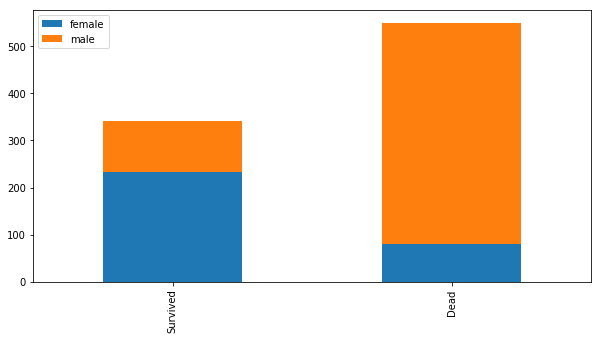

In [127]:
plot_bar(df,'Sex')

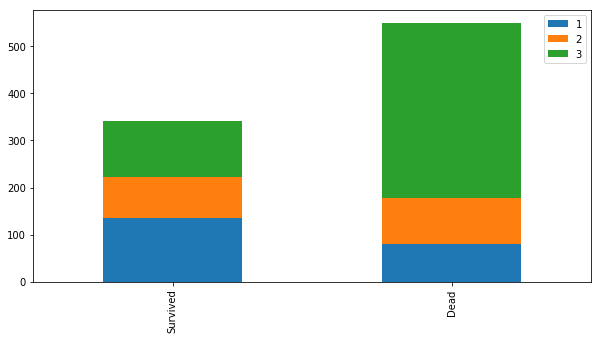

In [128]:
plot_bar(df,'Pclass')

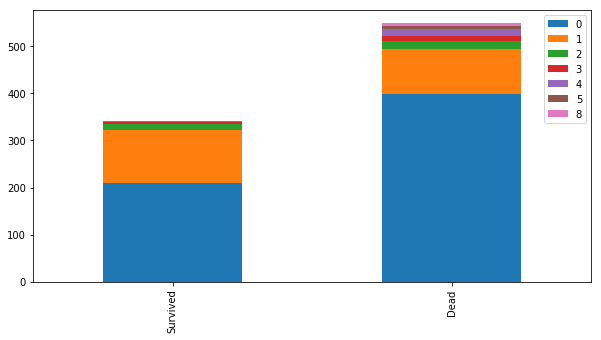

In [130]:
plot_bar(df,'SibSp')

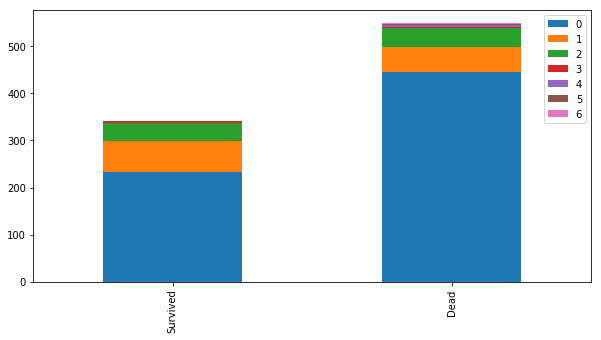

In [131]:
plot_bar(df,'Parch')

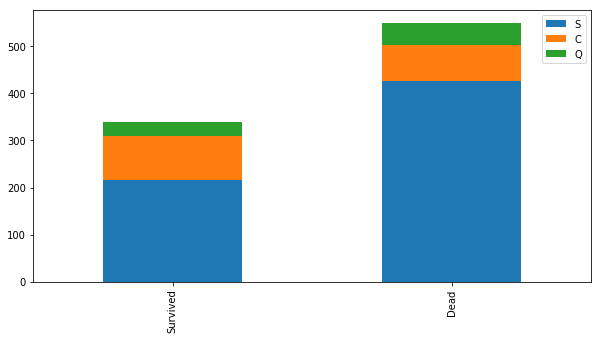

In [132]:
plot_bar(df,'Embarked')

In [133]:
complete_data = [df, dft] 

for dataset in complete_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [134]:
complete_data[0]['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Countess      1
Ms            1
Mme           1
Sir           1
Lady          1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [135]:
map_title={"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3}
for dataset in complete_data:
    dataset['Title']=dataset['Title'].map(map_title)

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [137]:
for dataset in complete_data:
    dataset.drop('Name',axis=1,inplace=True)

In [138]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [139]:
map_sex={'male':0,'female':1}
for dataset in complete_data:
    dataset['Sex']=dataset['Sex'].map(map_sex)

In [140]:
dft.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [141]:
for dataset in complete_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [143]:
for dataset in complete_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [144]:
def plot_pclass_feature(data,feature):
    pclass1=data[data['Pclass']==1][feature].value_counts()
    pclass2=data[data['Pclass']==2][feature].value_counts()
    pclass3=data[data['Pclass']==3][feature].value_counts()
    df1=pd.DataFrame([pclass1,pclass2,pclass3])
    df1.index = ['1st class','2nd class', '3rd class']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

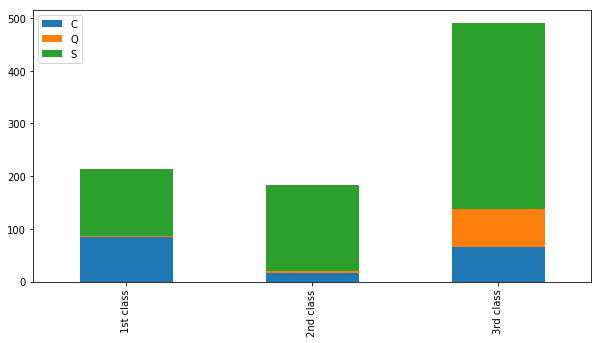

In [145]:
plot_pclass_feature(df,'Embarked')

In [157]:
for dataset in complete_data:
    dataset['Embarked'].fillna('S',inplace=True)

In [158]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,S,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [164]:
map_embark={'S':0,'C':1,'Q':2}
for datasets in complete_data:
    datasets['Embarked']=datasets['Embarked'].map(map_embark)

In [165]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [167]:
for datasets in complete_data:
    datasets["Fare"].fillna(datasets.groupby("Pclass")["Fare"].transform("median"), inplace=True)
    datasets.drop('Cabin',axis=1,inplace=True)

In [168]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,0,0


In [169]:
from sklearn.svm import SVC


In [180]:
import numpy as np

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [178]:
features_drop = ['Ticket', 'SibSp', 'Parch']
df = df.drop(features_drop, axis=1)
dft = dft.drop(features_drop, axis=1)
df = df.drop(['PassengerId'], axis=1)
training_set=df.drop('Survived',axis=1)

target=df['Survived']
print(training_set.shape, target.shape)
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, training_set, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

(891, 6) (891,)
[0.77777778 0.7752809  0.82022472 0.7752809  0.78651685 0.82022472
 0.83146067 0.80898876 0.79775281 0.84269663]


In [181]:
round(np.mean(score)*100,2)

80.36

In [183]:
test_data = dft.drop("PassengerId", axis=1).copy()
clf.fit(training_set,target)
prediction = clf.predict(test_data)

In [185]:
submission = pd.DataFrame({
        "PassengerId": dft["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [186]:
sub=pd.read_csv('submission.csv')

In [187]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
